In [2]:
import numpy as np
from netCDF4 import Dataset
from scipy.interpolate import UnivariateSpline
from scipy.interpolate import splrep
import matplotlib.pyplot as plt
import xarray as xr
%matplotlib inline

In [3]:
#read yearly climo data from netcdf files
choose_lon   = 'X/first/last/RANGE'
choose_lat   = 'Y/-5.0/5.0/RANGE%5BY%5Daverage'
stype = 'clim'
var = 'h20'
url1 = 'http://kage.ldeo.columbia.edu:81/SOURCES/.LDEO/.ClimateGroup/.PROJECTS/'\
           +'.TCC/.ORAs4/.'+var+'-'+stype+'.nc/.'+var\
           +'/'+choose_lat+'/'+choose_lon+'/dods'
 
ds1 = xr.open_dataset(url1)
X   = ds1.X.values
h20 = ds1.h20.values

var = 'T50'
url2 = 'http://kage.ldeo.columbia.edu:81/SOURCES/.LDEO/.ClimateGroup/.PROJECTS/'\
           +'.TCC/.ORAs4/.'+var+'-'+stype+'.nc/.'+var\
           +'/'+choose_lat+'/'+choose_lon+'/dods'
       
ds2 = xr.open_dataset(url2)
T50 = ds2.T50.values


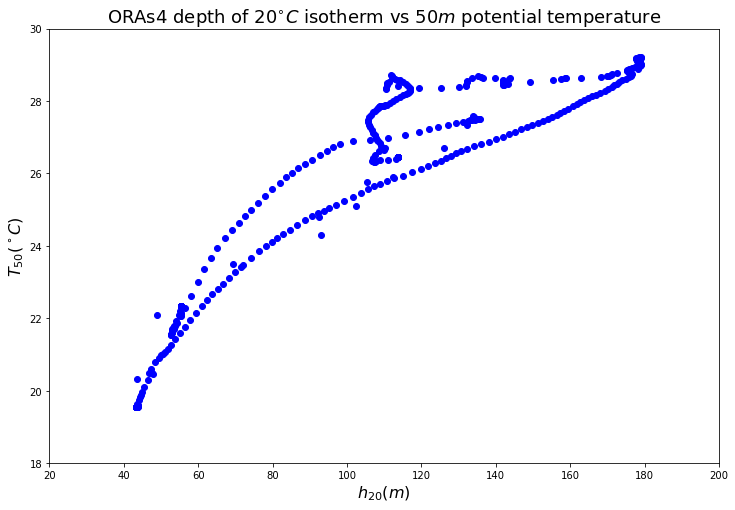

In [4]:
fig = plt.figure(figsize=(12,8))
plt.plot(h20, T50, 'bo')
plt.axis([20, 200, 18, 30])
plt.title(r'ORAs4 depth of $20^{\circ}C$ isotherm vs $50m$ potential temperature', fontsize=18)
plt.xlabel(r'$h_{20}(m)$', fontsize=16)
plt.ylabel(r'$T_{50}(^\circ C$)', fontsize=16)
plt.show()

In [5]:
# separate the data by basins

glob     = np.where((X > 0) & (X < 360))
pacific  = np.where((X > 140) & (X < 280))
atlantic = np.where((X > 310) | (X < 10))
indian   = np.where((X > 40) & (X < 100))
indo     = np.where((X > 100) & (X < 140))

tdeep_pac = T50[pacific]
h20_pac   = h20[pacific]
tdeep_atl = T50[atlantic]
h20_atl   = h20[atlantic]
tdeep_ind = T50[indian]
h20_ind   = h20[indian]
tdeep_indo = T50[indo]
h20_indo   = h20[indo]

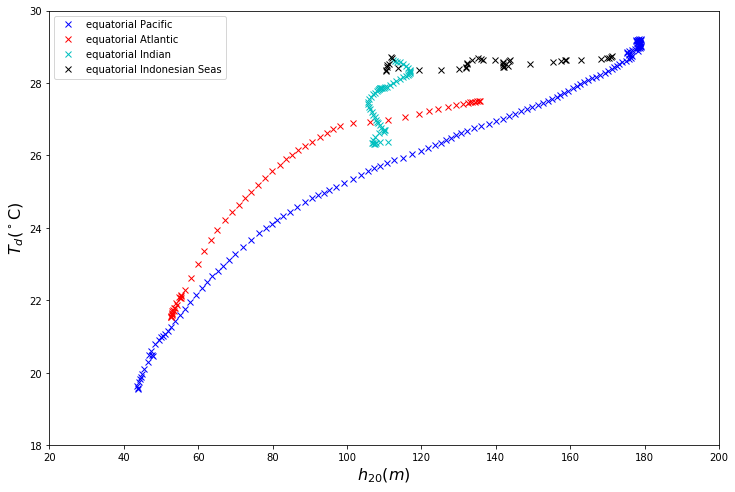

In [6]:
fig = plt.figure(figsize=(12,8))
plt.plot(h20_pac, tdeep_pac, 'bx',label='equatorial Pacific')
plt.plot(h20_atl, tdeep_atl, 'rx',label='equatorial Atlantic')
plt.plot(h20_ind, tdeep_ind, 'cx',label='equatorial Indian')
plt.plot(h20_indo, tdeep_indo, 'kx',label='equatorial Indonesian Seas')

plt.axis([20, 200, 18, 30])
plt.xlabel(r'$h_{20}(m)$', fontsize=16)
plt.ylabel(r'$T_d$($^\circ$C)', fontsize=16)
plt.legend(loc='upper left')
plt.show()

In [7]:
# sort the h20 data 
indx = np.argsort(h20_pac)
h20_pac = h20_pac[indx]
tdeep_pac = tdeep_pac[indx]

indx = np.argsort(h20_atl)
h20_atl = h20_atl[indx]
tdeep_atl = tdeep_atl[indx]

indx = np.argsort(h20_ind)
h20_ind = h20_ind[indx]
tdeep_ind = tdeep_ind[indx]

indx = np.argsort(h20_indo)
h20_indo = h20_indo[indx]
tdeep_indo = tdeep_indo[indx]


In [10]:
# Calculate splines for each basin:
f_pac = UnivariateSpline(h20_pac, tdeep_pac)
#f_pac.set_smoothing_factor(1.0)
knots_pac=f_pac.get_knots()
coeffs_pac=f_pac.get_coeffs()
print(knots_pac)
print(coeffs_pac)
f_atl = UnivariateSpline(h20_atl, tdeep_atl)
#f_atl.set_smoothing_factor(0.1)
knots_atl=f_atl.get_knots()
f_ind = UnivariateSpline(h20_ind, tdeep_ind)
f_indo = UnivariateSpline(h20_indo, tdeep_indo)

[  43.67122615  179.14252403]
[ 19.83005678  27.41043418  25.23421711  29.11466924]


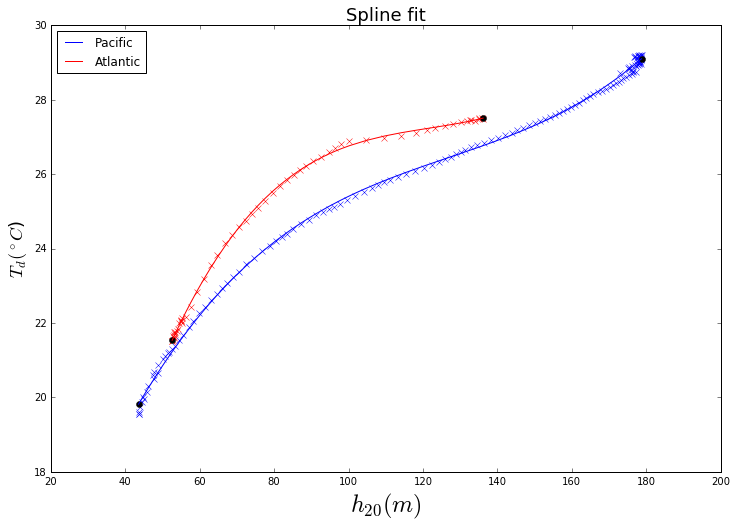

In [32]:
fig = plt.figure(figsize=(12,8))
plt.plot(h20_pac, tdeep_pac, 'bx')
plt.plot(knots_pac,f_pac(knots_pac),'ko')
plt.plot(h20_pac, f_pac(h20_pac), 'b-',label='Pacific')

plt.plot(h20_atl, tdeep_atl, 'rx')
plt.plot(knots_atl,f_atl(knots_atl),'ko')
plt.plot(h20_atl, f_atl(h20_atl), 'r-', label='Atlantic')

#plt.plot(h20_ind, tdeep_ind, 'cx')
#plt.plot(knots_ind,f_ind(knots_ind),'ko')
#plt.plot(h20_ind, f_ind(h20_ind), 'c-', label='Indian')

#plt.plot(h20_indo, tdeep_indo, 'kx')
#plt.plot(h20_indo, f_indo(h20_indo), 'k-', label='IndonesianSea')

plt.axis([20, 200, 18, 30])
plt.title(r'Spline fit', fontsize=18)
plt.xlabel(r'$h_{20}(m)$', fontsize=24)
plt.ylabel(r'$T_d(^\circ C$)', fontsize=18)
plt.legend(loc='upper left')
plt.show()


In [17]:
# don't get picky about fit, use s=10 to get just a single spline
[knots,coeffs,k] = splrep(h20_pac, tdeep_pac, k=3, s=10)
np.savez('spline', knots=knots, coeffs=coeffs)

f_pac(160)

array(27.78788706534696)